# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [80]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,precision_score,roc_curve,auc
from sklearn import metrics
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

%matplotlib inline  

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [8]:
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

pima_df = pd.read_csv("pima-indians-diabetes.data", names= colnames)
pima_df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [9]:
pima_df.head(10)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [11]:
pima_df.shape

(768, 9)

In [15]:
pima_df.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [26]:
pima_df.median()

preg       3.0000
plas     117.0000
pres      72.0000
skin      23.0000
test      30.5000
mass      32.0000
pedi       0.3725
age       29.0000
class      0.0000
dtype: float64

In [30]:
pima_df = pima_df.replace(0,pima_df.median())
pima_df.head(10)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,3,137,40,35,168.0,43.1,2.288,33,1
5,5,116,74,23,30.5,25.6,0.201,30,0
6,3,78,50,32,88.0,31.0,0.248,26,1
7,10,115,72,23,30.5,35.3,0.134,29,0
8,2,197,70,45,543.0,30.5,0.158,53,1
9,8,125,96,23,30.5,32.0,0.232,54,1


# Q5 Print the descriptive statistics of each & every column using describe() function

In [64]:
pima_df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.278646,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.021516,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

In [67]:
pima_df.groupby(["class"]).count()

,preg,plas,pres,skin,test,mass,pedi,age
class,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

class
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

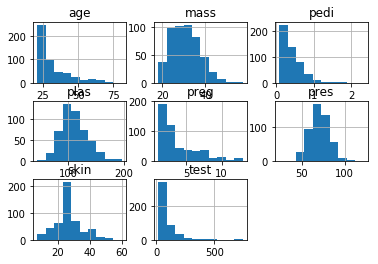

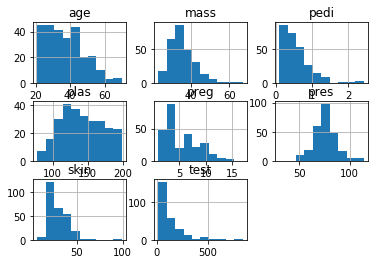

In [148]:
pima_df.groupby(["class"]).hist()

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


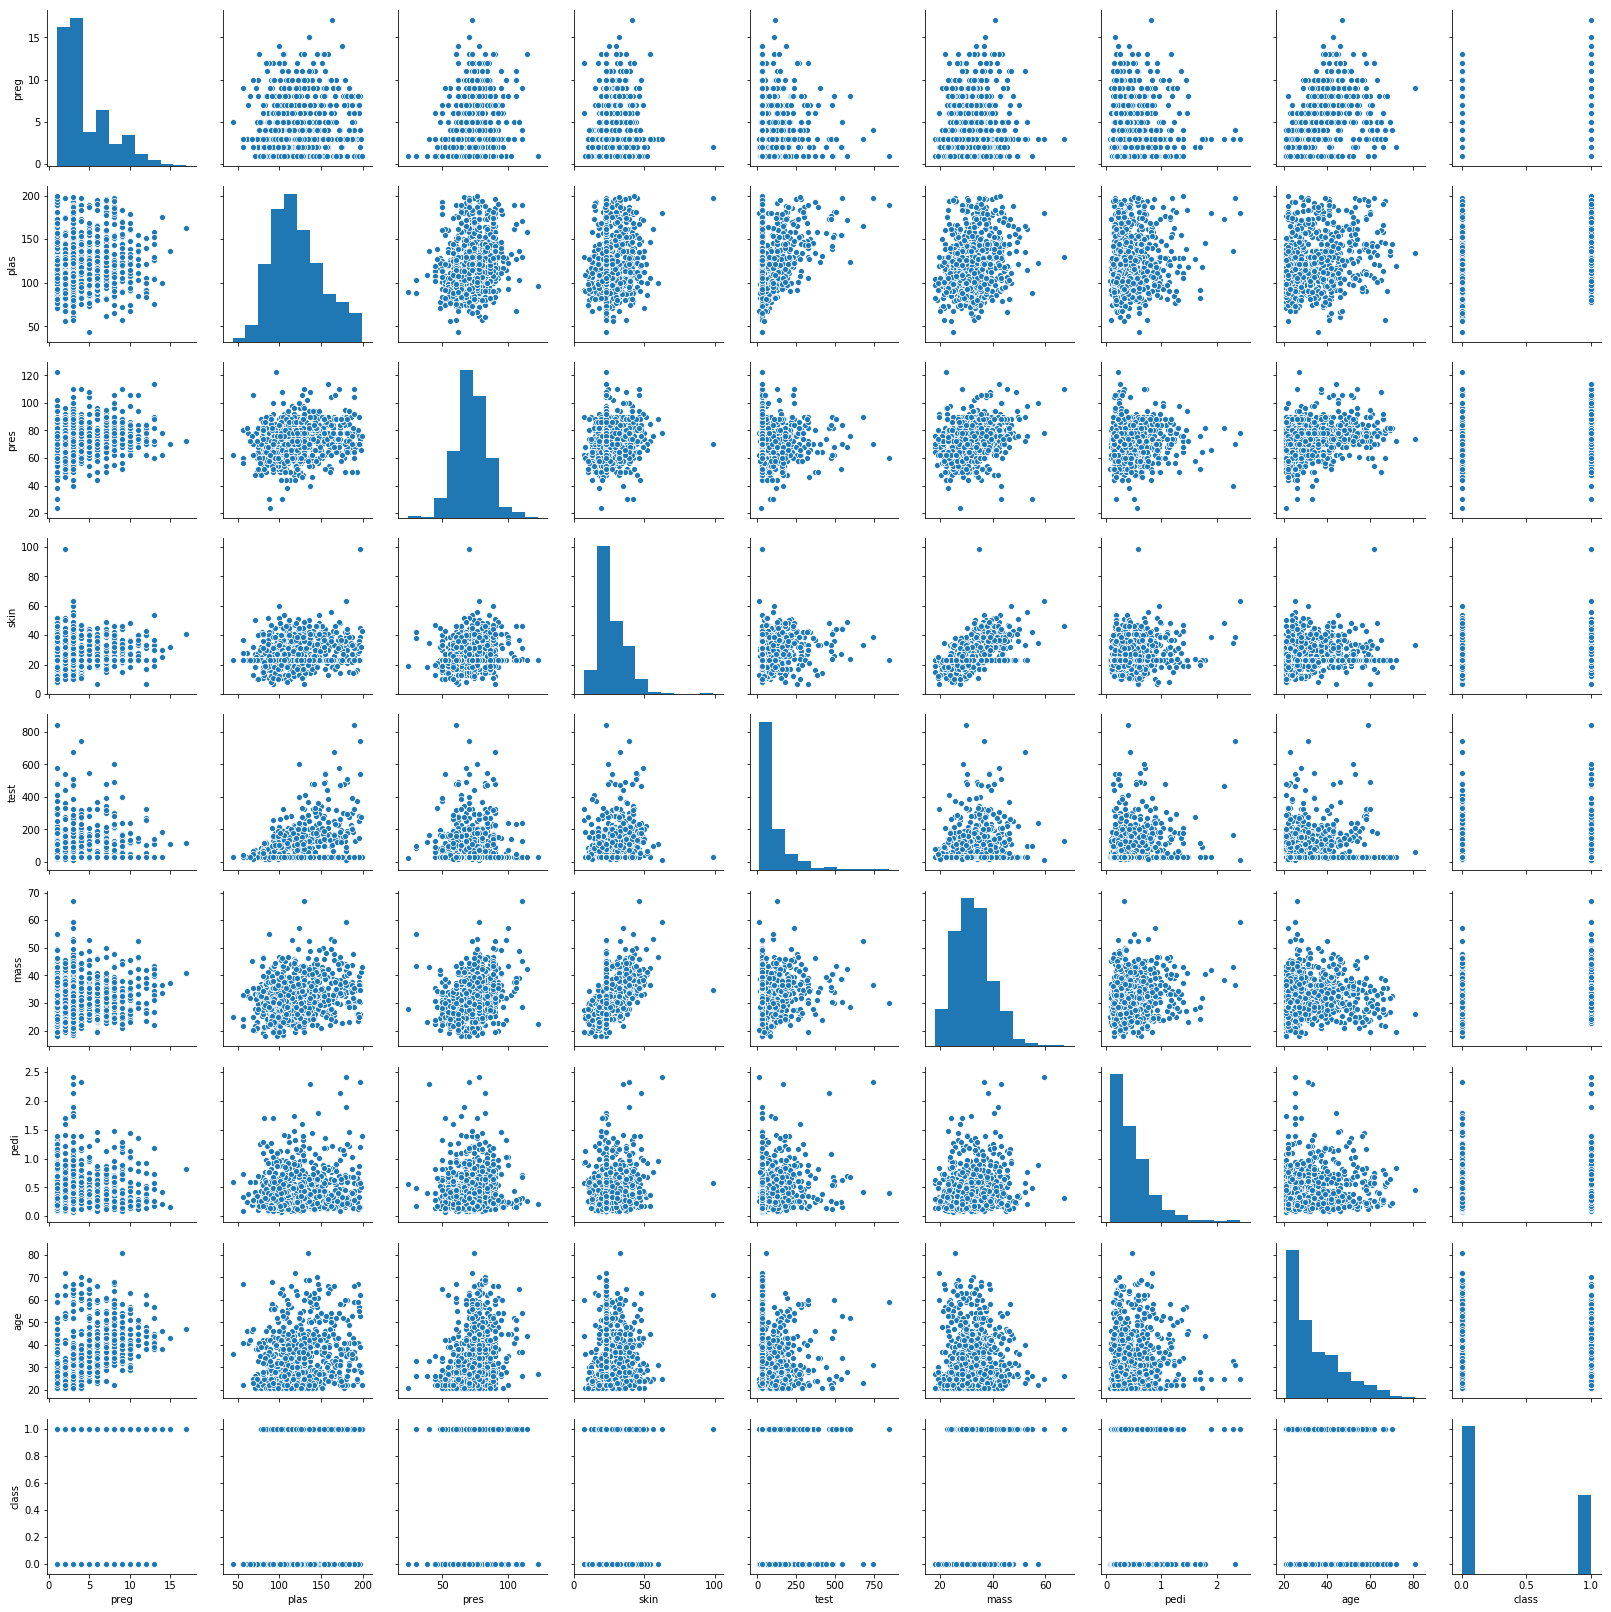

In [152]:
sns.pairplot( pima_df)

In [69]:
pima_df.corr()

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,0.149326,0.247530,0.060706,-0.059580,0.080540,-0.016151,0.538169,0.245466
plas,0.149326,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
pres,0.247530,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
skin,0.060706,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
test,-0.059580,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
mass,0.080540,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
pedi,-0.016151,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
age,0.538169,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
class,0.245466,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


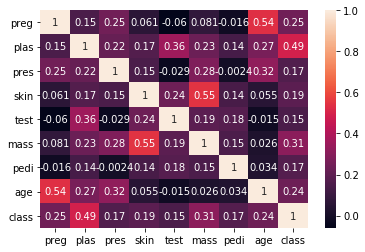

In [70]:
sns.heatmap( pima_df.corr(), annot=True)

#Inference

Class is highly correlated with plas and mass

Using the plot - infer the relationship between different variables

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [153]:
X = pima_df.drop('class',axis = 1)
y = pima_df["class"]
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
X_train, X_test, y_train, y_test

(     preg  plas  pres  skin   test  mass   pedi  age
 590    11   111    84    40   30.5  46.8  0.925   45
 692     2   121    70    32   95.0  39.1  0.886   23
 492     4    99    68    38   30.5  32.8  0.145   33
 205     5   111    72    28   30.5  23.9  0.407   27
 709     2    93    64    32  160.0  38.0  0.674   23
 3       1    89    66    23   94.0  28.1  0.167   21
 58      3   146    82    23   30.5  40.5  1.781   44
 223     7   142    60    33  190.0  28.8  0.687   61
 101     1   151    60    23   30.5  26.1  0.179   22
 746     1   147    94    41   30.5  49.3  0.358   27
 221     2   158    90    23   30.5  31.6  0.805   66
 471     3   137    70    38   30.5  33.2  0.170   22
 564     3    91    80    23   30.5  32.4  0.601   27
 209     7   184    84    33   30.5  35.5  0.355   41
 52      5    88    66    21   23.0  24.4  0.342   30
 17      7   107    74    23   30.5  29.6  0.254   31
 229     3   117    80    31   53.0  45.2  0.089   24
 299     8   112    72    23

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [113]:
dt_model = DecisionTreeClassifier(criterion = 'entropy')

In [114]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [116]:
y_predict = dt_model.predict(X_test)

In [119]:
print(dt_model.score(X_train , y_train))
print(dt_model.score(X_test , y_test))

1.0
0.7316017316017316


# Q10 Print the accuracy of the model & print the confusion matrix 

In [120]:
print(metrics.confusion_matrix(y_test, y_predict))

[[116  31]
 [ 31  53]]


In [121]:
r

,0
accuracy,0.766234
recall,0.880952
precision,0.627119


Print the feature importance of the decision model - Optional

In [154]:
pima_df.dropna(inplace=True)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import datasets

data_complete = pd.get_dummies(pima_df,drop_first=True)
data_mat = data_complete.as_matrix()
data_mat.shape

C:\Users\pn9220\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


(768, 9)

In [155]:
vif = [ variance_inflation_factor( data_mat, i ) for i in range( data_mat.shape[1] ) ]

In [156]:
vif_factors = pd.DataFrame()
vif_factors['column'] = list(data_complete.columns)
vif_factors['vif'] = vif
vif_factors

,column,vif
0,preg,4.398677
1,plas,23.294297
2,pres,34.625652
3,skin,14.392759
4,test,2.245025
5,mass,33.889116
6,pedi,3.203577
7,age,13.991711
8,class,2.015783


# Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [122]:
from sklearn.ensemble import RandomForestClassifier

In [123]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)

In [124]:
y_predict = rfcl.predict(X_test)

In [125]:
print(rfcl.score(X_train , y_train))
print(rfcl.score(X_test , y_test))

1.0
0.7748917748917749


In [126]:
print(metrics.confusion_matrix(y_test, y_predict))

[[123  24]
 [ 28  56]]


In [127]:
r

,0
accuracy,0.766234
recall,0.880952
precision,0.627119


# Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [128]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=10)

In [129]:
abcl = abcl.fit(X_train, y_train)

In [130]:
y_predict = abcl.predict(X_test)

In [131]:
print(abcl.score(X_train , y_train))
print(abcl.score(X_test , y_test))

1.0
0.7186147186147186


In [132]:
print(metrics.confusion_matrix(y_test, y_predict))

[[115  32]
 [ 33  51]]


In [133]:
r

,0
accuracy,0.766234
recall,0.880952
precision,0.627119


# Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [134]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dt_model, n_estimators=50)

In [135]:
bgcl = bgcl.fit(X_train, y_train)

In [137]:
y_predict = bgcl.predict(X_test)

In [138]:
print(bgcl.score(X_train , y_train))
print(bgcl.score(X_test , y_test))

0.9981378026070763
0.7445887445887446


In [139]:
print(metrics.confusion_matrix(y_test, y_predict))

[[117  30]
 [ 29  55]]


In [140]:
r

,0
accuracy,0.766234
recall,0.880952
precision,0.627119


# Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [142]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50)
gbcl = gbcl.fit(X_train, y_train)

In [143]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_train , y_train))
print(gbcl.score(X_test , y_test))

0.8696461824953445
0.7662337662337663


In [144]:
print(metrics.confusion_matrix(y_test, y_predict))

[[120  27]
 [ 27  57]]


In [145]:
r

,0
accuracy,0.766234
recall,0.880952
precision,0.627119


# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.